# Final Project Submission

Student name: Wendy Mwiti

Student pace: Full time

Instructor: Antonny Muiko/ Nikita Njoroge /William Okomba /Lucille Kaleha


#  Overview
I have been tasked by a real estate agency to provide insights regarding saleprices of houses. My objective is to make predictions about the sale prices of the houses based on certain house features so that the real estate agency can be able to advice on owners on what improvements they can make to their homes to maximise profits. I will be using several independent variables(predictors) against the target variable(price) to create regression models to achieve my objective

# Business Understanding
Many King County residents intend to sell their homes at the highest possible price with the real estate business becoming very profitable and competitive at the same time. A real estate agency is providing guidance to these homeowners about how home renovations might increase the estimated value of their homes and by what amount. The real estate agency requires information about what factors are important for determining a homes value.

# Data Understanding
This a dataset on houses in King County about the prices each house was sold for as well as the number of predictor variables

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import missingno as msno
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Column Names and Descriptions for King County Data Set
id - Unique identifier for a house

date - Date house was sold

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
view - Quality of view from house

Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
condition - How good the overall condition of the house is. Related to maintenance of house.

grade - Overall grade of the house. Related to the construction and design of the house.

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
#Loading data
kc_house_df = pd.read_csv('data/kc_house_data.csv')
#preview first 5 rows
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#preview last 5 columns
kc_house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
class dataUnderstanding(object):
    """A class that gets the metadata of the dataframe"""
    
    def __init__(self, df):
        self.shape = df.shape
        self.info = df.info
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes
        self.describe = df.describe().T

In [5]:
# Instantiate the class
understanding = dataUnderstanding(kc_house_df)

In [6]:
print(f"Shape:{understanding.shape}")

Shape:(21597, 21)


In [7]:
# Summary of the dataset
print(understanding.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Check for duplicates
print(f"Duplicates: {understanding.duplicates}")

Duplicates: 0


In [9]:
# Check the number of missing values
understanding.missing

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, Yr_renovated and View have missing values in them

In [10]:
print(understanding.types)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [11]:
print(understanding.describe)

                 count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   17755.0  8.363678e+01  3.999464e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+

# Data Preparation

## Completeness

Waterfront, Yr_renovated and View have missing values in them. Some will require imputation while others will be transformed.
For Waterfront, missing values could possibly indicate the lack of a Waterfront view; imputing with "0" is the best way forward.
View identifies the quality of view from the house with five categories: None, Average, Fair, Good, Excellent. One could argue that missing values indicate a lack of a view. Either we drop them or impute them with 0.

In [12]:
# Waterfront Completeness

kc_house_df['waterfront'] = kc_house_df['waterfront'].fillna(value=0)

# View Completeness

kc_house_df['view'] = kc_house_df['view'].fillna(value=0)

## Validity
To ensure validity within the dataset, we will be making sure that the data is in the correct format.
Cast Condition as Category to solve hierachy problem and change date format



In [13]:
kc_house_df['date'] = pd.to_datetime(kc_house_df['date'], infer_datetime_format=True)

kc_house_df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [14]:
#astype waterfront, view, condition and grade into categorical columns
category_columns = [col for col in kc_house_df.columns if kc_house_df[col].dtype == 'object' and col not in ['sqft_basement', 'date']]
kc_house_df[category_columns] = kc_house_df[category_columns].astype('category')

In [15]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  category      
 9   view           21597 non-null  category      
 10  condition      21597 non-null  category      
 11  grade          21597 non-null  category      
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

### Outlier Treatment

In [16]:
def box_plot(data,column,hue=None):
    plt.figure(figsize=(12,6))
    sns.boxplot(x=column,data=data,hue=hue)
    plt.title(f"{column} outliers")
    plt.xticks
    plt.show()

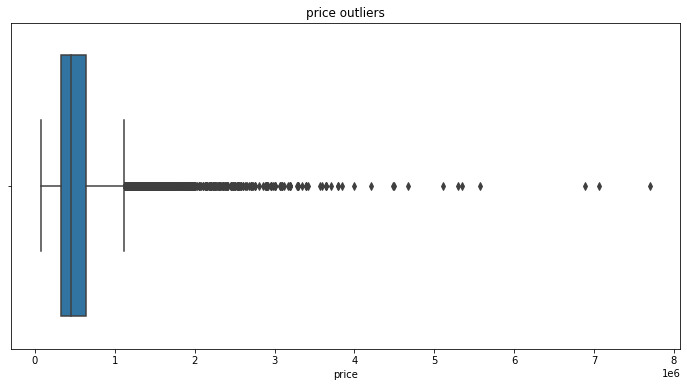

None


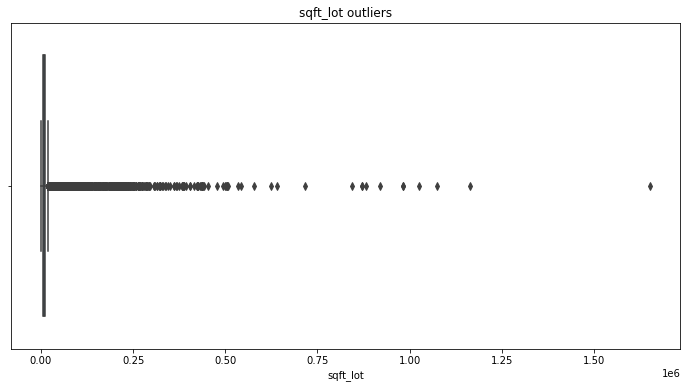

None


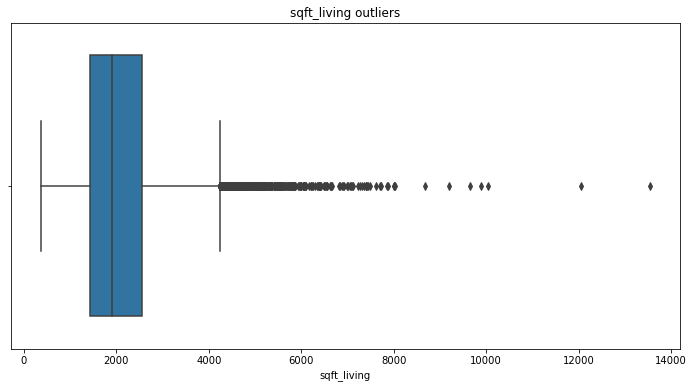

None


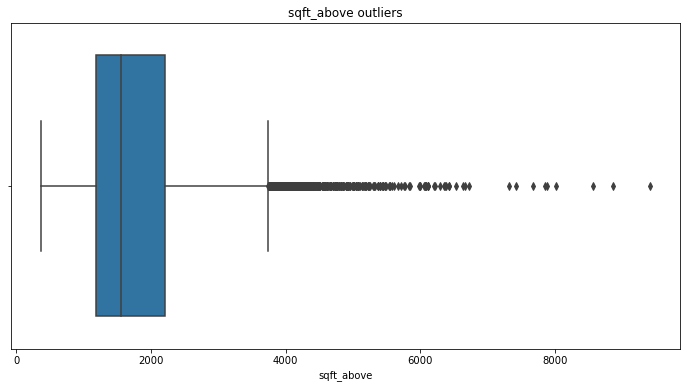

None


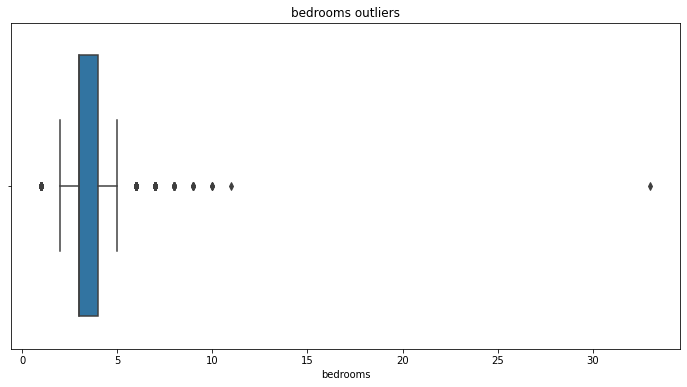

None


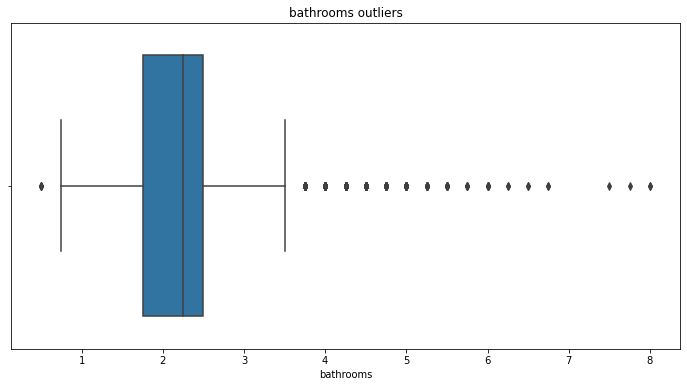

None


In [17]:
print(box_plot(kc_house_df, 'price'))
print(box_plot(kc_house_df, 'sqft_lot'))
print(box_plot(kc_house_df, 'sqft_living'))
print(box_plot(kc_house_df, 'sqft_above'))
print(box_plot(kc_house_df, 'bedrooms'))
print(box_plot(kc_house_df, 'bathrooms'))

There are outliers in all the visualized columns. However, I will be rescaling the data and this will make use of the outliers and also to make sure that I do not lose a huge amount of data.

## Exploratory Data Analysis

### Univariate Data Analysis
There some categorical columns in this dataset that can take on only a limited number of possible values that I shall visualize. The columns are waterfront, view, condition, grade.

In [18]:
def column_counts(df, col, title):
    ''' Plots a bar chat of the value counts of a column in the dataframe '''
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', figsize=(12, 8), color='hotpink', edgecolor= 'black')
    plt.title(title)
    plt.xticks(rotation=45)


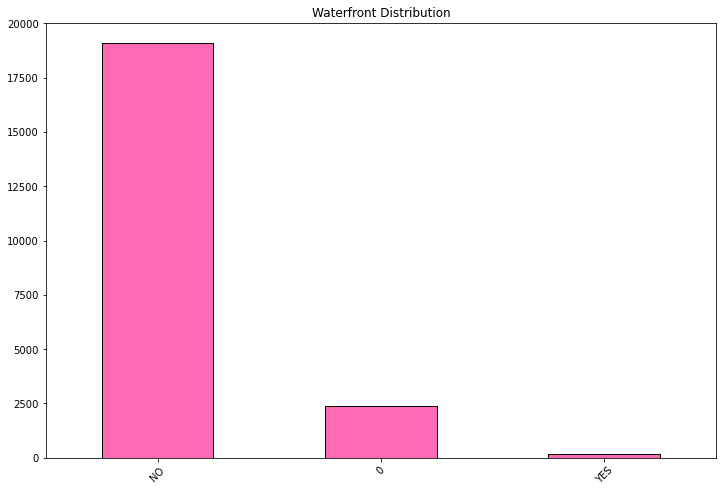

In [19]:
column_counts(kc_house_df, 'waterfront', 'Waterfront Distribution')

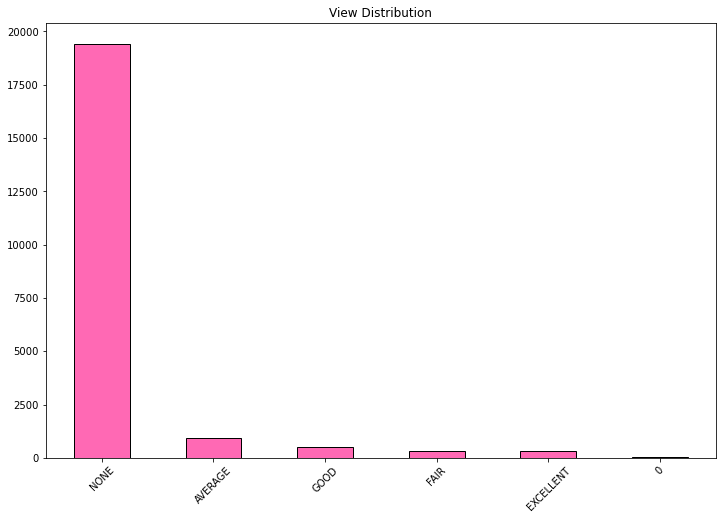

In [20]:
column_counts(kc_house_df, 'view', 'View Distribution')

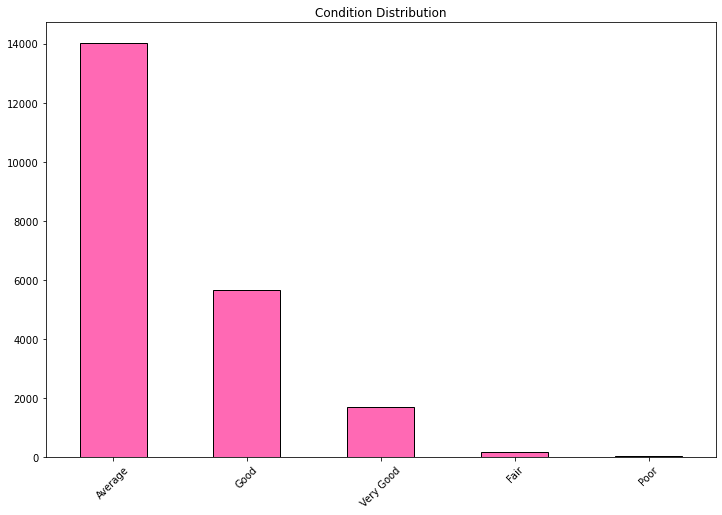

In [21]:
column_counts(kc_house_df, 'condition', 'Condition Distribution')

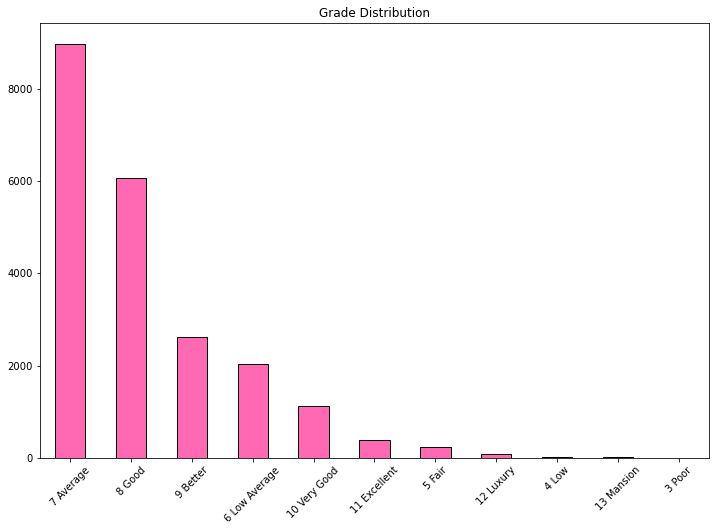

In [22]:
column_counts(kc_house_df, 'grade', 'Grade Distribution')

In [23]:
kc_house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')